In [46]:
# import the necessary packages
import streamlit as st
from scipy.spatial import distance as dist
import matplotlib.pyplot as plt
import numpy as np
import argparse
import glob
import cv2


In [9]:

# construct the argument parser and parse the arguments
#ap = argparse.ArgumentParser()
#ap.add_argument("-d", "--dataset", required = True,
#	help = "Path to the directory of images")
#args = vars(ap.parse_args())
args = "D:\Python\Bier_Deckel\BierDeckel"
# initialize the index dictionary to store the image name
# and corresponding histograms and the images dictionary
# to store the images themselves
index = {}
images = {}

In [47]:
# loop over the image paths
for imagePath in glob.glob("BierDeckel"+ "/*.jpg"):
	# extract the image filename (assumed to be unique) and
	# load the image, updating the images dictionary
	filename = imagePath[imagePath.rfind("/") + 1:]
	image = cv2.imread(imagePath)
	images[filename] = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	# extract a 3D RGB color histogram from the image,
	# using 8 bins per channel, normalize, and update
	# the index
	hist = cv2.calcHist([image], [0, 1, 2], None, [8, 8, 8],
		[0, 256, 0, 256, 0, 256])
	hist = cv2.normalize(hist, hist).flatten()
	index[filename] = hist

In [11]:
index["D:\\Python\\Bier_Deckel\\BierDeckel\\TestBild.jpg"]

array([6.4877141e-03, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e

In [43]:
#testimage = "D:\Python\Bier_Deckel\BierDeckel\TestBild.jpg"
testimage = "D:\Python\Bier_Deckel\BierDeckel\TestBild2.jpg"


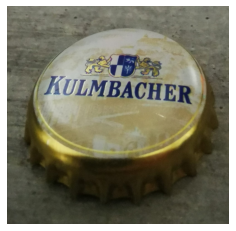

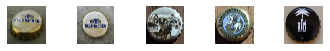

In [45]:
# METHOD #2: UTILIZING SCIPY
# initialize the scipy methods to compaute distances
# SCIPY_METHODS = (
# 	("Euclidean", dist.euclidean),
# 	("Manhattan", dist.cityblock), #1,1,1,1
# 	("Chebysev", dist.chebyshev))
# # loop over the comparison methods
# for (methodName, method) in SCIPY_METHODS:
	# initialize the dictionary dictionary
results = {}
# loop over the index
for (k, hist) in index.items():
	# compute the distance between the two histograms
	# using the method and update the results dictionary
	d = dist.cityblock(index[testimage], hist)
	results[k] = d
# sort the results
results = sorted([(v, k) for (k, v) in results.items()])
results = results[:5]
# show the query image
st.write("Dein Bild:")
st.image(images[testimage])
fig = plt.figure("Query")


In [ ]:

# initialize the results figure
fig = plt.figure("Results: %s" % ("Manhattan"))
#fig.suptitle(methodName, fontsize = 5)
# loop over the results
for (i, (v, k)) in enumerate(results):
	# show the result
	ax = fig.add_subplot(5, 5, i + 1)
	#ax.set_title("%s: %.2f" % (k, v))
	plt.imshow(images[k])
	plt.axis("off")
# show the SciPy methods
plt.show()